In [1]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/root/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


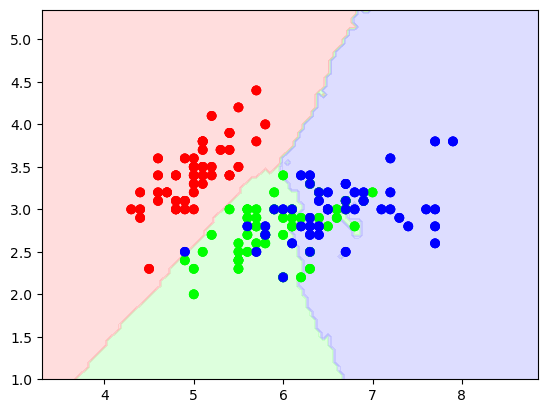

In [7]:
def knnDemo(X, y, n):
    #cresates the classifier and fits it to the  data
    res = 0.05
    k1 = knn(n_neighbors=n, p=2, metric='minkowski')
    k1.fit(X, y)
    
    #sets up the grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, res), np.arange(x2_min, x2_max, res))
    
    #makes the prediction
    Z = k1.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    #creates the color map
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
    
    #Plots the decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap_light)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plots the samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    plt.show()
    
iris = datasets.load_iris()
X1 = iris.data[:, 0:3:2]
X2 = iris.data[:, 0:2]
X3 = iris.data[:,1:3]

y=iris.target
knnDemo(X2, y, 15)
    